In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('/content/50_Startups (1).csv')

In [3]:

data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


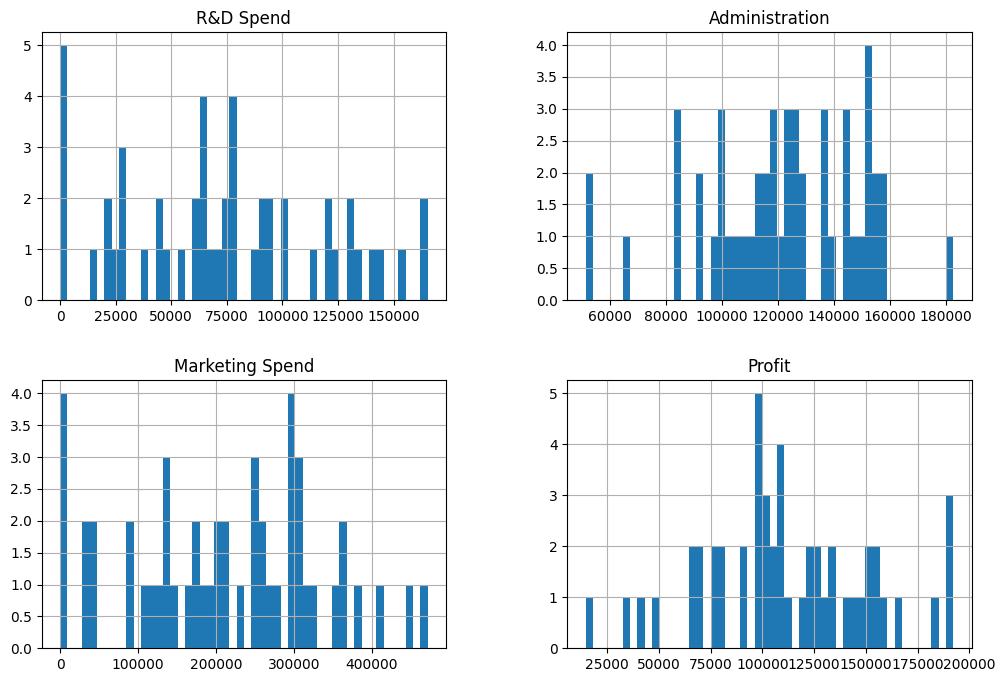

In [4]:
data.hist(bins=50, figsize=(12,8))
plt.show()

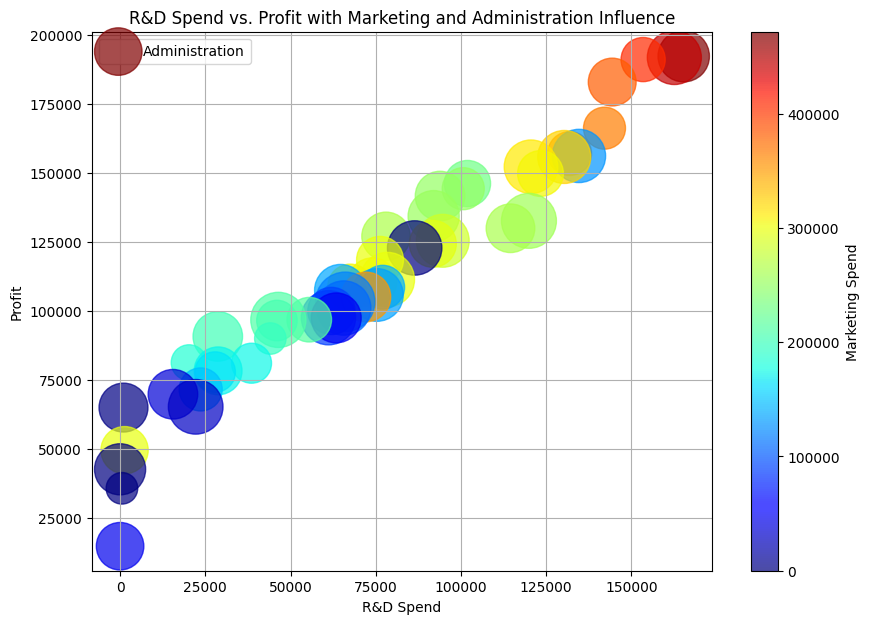

In [6]:
# Scatter plot for R&D Spend vs. Profit
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    x=data["R&D Spend"],
    y=data["Profit"],
    c=data["Marketing Spend"],
    cmap="jet",
    s=data["Administration"] / 100,  # Marker size proportional to Administration spend
    alpha=0.7
)

plt.colorbar(scatter, label="Marketing Spend")
plt.title("R&D Spend vs. Profit with Marketing and Administration Influence")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.legend(["Administration"], loc="upper left")
plt.grid(True)
plt.show()

In [8]:
data.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [10]:
X = data[["R&D Spend"]]  # Independent variable
y = data["Profit"]       # Dependent variable

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [15]:
r2_score( y_test, y_pred)

0.9265108109341951

In [16]:
print(lr.intercept_)

49336.6680379911


In [17]:
#checking the prediction
lr.predict(X[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [18]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [19]:
import pickle

In [20]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [21]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [22]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [23]:
clf2.predict(X[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [37]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


MULTIPLE LINEAR REGRESSION

In [25]:
X = data.drop(columns=["Profit"])  # Independent variables
y = data["Profit"]                 # Target variable


In [26]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (50, 4)
Shape of y: (50,)


In [27]:
X = X.values
y = y.values

In [28]:
print("Shape of X:", X_train.shape)
print("Shape of y:", y_train.shape)

Shape of X: (40, 1)
Shape of y: (40,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' is your DataFrame
# ... (your previous code to load and prepare data) ...

# 1. Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# 2. Fit the encoder on the 'State' column and transform it
encoded_states = encoder.fit_transform(data[['State']])

# 3. Create a DataFrame from the encoded states
encoded_states_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['State']))

# 4. Drop the original 'State' column and concatenate the encoded columns
data = data.drop(columns=['State'])
data = pd.concat([data, encoded_states_df], axis=1)


# 5. Now, redefine X and y using the updated DataFrame
X = data.drop(columns=["Profit"])  # Independent variables
y = data["Profit"]                 # Target variable

# 6. Continue with train_test_split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

y_pred_multiple = model_multiple.predict(X_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 82010363.0442
  R² Score: 0.8987


In [33]:
print(model_multiple.intercept_)

54343.29984897948


In [34]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [35]:
model_multiple.predict(X[0:5])

array([191913.72740386, 187861.47839017, 183805.40426655, 173623.19035613,
       174098.25202593])

In [36]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126362.879083
39   81005.76   84608.453836
30   99937.59   99677.494251
45   64926.08   46357.460686
17  125370.37  128750.482885
